In [5]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

`i` : 喷管位置

In [15]:
gamma = 1.4 
deltaX = 0.1
start, end = 0, 3
xs = np.linspace(start, end, (int)((end - start)//deltaX) + 2)
print(xs)
sz = xs.shape[0]
As = np.array([0.0] * sz)
mid1_5 = int(sz // 2 + 1) # x = 1.5时对应的节点
print(mid1_5)
for i in range(mid1_5):
    As[i] = 1 + 2.2 * (xs[i] - 1.5) ** 2
for i in range(mid1_5, sz):
    As[i] = 1 + 0.2223 * (xs[i] - 1.5) ** 2
print(As)
pN = (1 - 0.023 * 3) * (1 - 0.000933 * 3)
pe = 0.93

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
16
[5.95     5.312    4.718    4.168    3.662    3.2      2.782    2.408
 2.078    1.792    1.55     1.352    1.198    1.088    1.022    1.
 1.002223 1.008892 1.020007 1.035568 1.055575 1.080028 1.108927 1.142272
 1.180063 1.2223   1.268983 1.320112 1.375687 1.435708 1.500175]


In [4]:
ts = [0] # 时间
rhos = [1 - 0.023 * x for x in xs]
print(1 - 0.023 * 0.1)
Ts = [1 - 0.009333 * x for x in xs]
Vs = [(0.05 + 0.11 * x) * np.sqrt(1 - 0.2314 * x) for i, x in enumerate(xs)]

print(0.05 + 0.11 * 0.1 * np.sqrt(1 - 0.2314 * 0.1))
rho_mid = [rhos[16]]
V_mid = [Vs[16]]
T_mid = [Ts[16]]
rho_t_mid = [0]
rho_t_mid2 = [0]

for it in range(5000):
    print('rhos: ', rhos)
    print('Ts: ', Ts)
    print('Vs: ', Vs)
    rho_t = np.array([-rhos[i] * (Vs[i + 1] - Vs[i]) / deltaX - Vs[i] * (rhos[i + 1] - rhos[i]) / deltaX - rhos[i] * Vs[i] * (np.log(As[i + 1]) - np.log(As[i])) / deltaX for i in range(sz - 1)])
    V_t = np.array([- Vs[i] * (Vs[i + 1] - Vs[i]) / deltaX - 1 / gamma * ((Ts[i + 1] - Ts[i]) / deltaX + Ts[i] / rhos[i] * (rhos[i + 1] - rhos[i]) / deltaX) for i in range(sz - 1)])
    T_t = np.array([- Vs[i] * (Ts[i + 1] - Ts[i]) / deltaX - (gamma - 1) * Ts[i] * ((Vs[i + 1] - Vs[i]) / deltaX + Vs[i] * (np.log(As[i + 1]) - np.log(As[i])) / deltaX) for i in range(sz - 1)])
    print(rho_t)
    print(V_t)
    print(T_t)
    print('---------')
    deltats = [deltaX / (Vs[i] + np.sqrt(Ts[i])) for i in range(1, sz - 1)]
    deltat = 0.5 * np.min(deltats)
    # print(deltats)
    # print(Ts)
    # print(Vs)
    # print(rhos)
    # print("-------------------------------")
    ts += [ts[-1] + deltat] # ts = ts + [ts[-1] + deltat]
    rho_t2 = np.append(rho_t, rho_t[-1])
    V_t2 = np.append(V_t, V_t[-1])
    T_t2 = np.append(T_t, T_t[-1])

    rhoY = rhos 
    VY = Vs 
    TY = Ts 
    rhos = rhos + rho_t2 * deltat 
    Vs = Vs + V_t2 * deltat 
    Ts = Ts + T_t2 * deltat 

    rho_t = np.array([-rhos[i] * (Vs[i] - Vs[i - 1]) / deltaX - Vs[i] * (rhos[i] - rhos[i - 1]) / deltaX - rhos[i] * Vs[i] * (np.log(As[i]) - np.log(As[i - 1])) / deltaX for i in range(1, sz)])
    V_t = np.array([- Vs[i] * (Vs[i] - Vs[i - 1]) / deltaX - 1 / gamma * ((Ts[i] - Ts[i - 1]) / deltaX + Ts[i] / rhos[i] * (rhos[i] - rhos[i - 1]) / deltaX) for i in range(1, sz)])
    T_t = np.array([- Vs[i] * (Ts[i] - Ts[i - 1]) / deltaX - (gamma - 1) * Ts[i] * ((Vs[i] - Vs[i - 1]) / deltaX + Vs[i] * (np.log(As[i]) - np.log(As[i - 1])) / deltaX) for i in range(1, sz)])

    rho_t = np.hstack([rho_t[0], rho_t])# [1, 2, 0.7, ...] -> [1, 1, 2, 0.7, ...]
    V_t = np.hstack([V_t[0], V_t])
    T_t = np.hstack([T_t[0], T_t])

    # 计算时间偏导数的平均值，计算矫正值
    rhos = rhoY + 0.5 * (rho_t + rho_t2) * deltat 
    Vs = VY + 0.5 * (V_t + V_t2) * deltat 
    Ts = TY + 0.5 * (T_t + T_t2) * deltat 

    # 边界条件
    rhos[0] = 1 
    Ts[0] = 1
    Vs[0] = 2 * Vs[1] - Vs[2] 
    Vs[-1] = 2 * Vs[-2] - Vs[-3]
    # Ts[-1] = 2 * Ts[-2] - Ts[-3] 
    # rhos[-1] = 0.93 / Ts[-1]
    rhos[-1] = 2 * rhos[-2] - rhos[-3]
    Ts[-1] = pe / rhos[-1]
    print(rhos[-1], Ts[-1], rhos[-1] * Ts[-1])

    print(rhos)
    print(Vs)
    print(Ts)
    # 记录喉道数据
    rho_mid += [rhos[16]]
    V_mid += [Vs[16]]
    T_mid += [Ts[16]]
    rho_t_mid += [rho_t[16]]
    rho_t_mid2 += [rho_t2[16]]

    


89602546 0.90343994
 0.91115926 0.9183433  0.92563895 0.93209072 0.93866423 0.94421664
 0.94976904]
Ts:  [1.         0.99925374 0.99906425 0.99841877 0.99773794 0.99671396
 0.99534271 0.99341355 0.99071821 0.98694904 0.98172833 0.97470971
 0.96577188 0.9556176  0.94647596 0.94241376 0.94301667 0.94396673
 0.94584962 0.94808155 0.95085202 0.95384688 0.957      0.9602812
 0.96339129 0.96663993 0.96941776 0.97248678 0.97474586 0.97765528
 0.97918542]
Vs:  [0.07783366 0.0884114  0.09898915 0.11242247 0.12795182 0.14674557
 0.16919677 0.19626213 0.22876293 0.26760082 0.31332367 0.36566148
 0.42249039 0.4783117  0.52258656 0.54055331 0.53821131 0.53350682
 0.52486653 0.51406346 0.50048517 0.48542656 0.46873199 0.45129845
 0.4331497  0.41486257 0.39650302 0.37844252 0.36065269 0.34360434
 0.32655599]
[-0.01604324 -0.00051859 -0.01001033 -0.00784735 -0.01202389 -0.01394656
 -0.01795913 -0.02208831 -0.02724952 -0.03264783 -0.03754473 -0.04014598
 -0.03753868 -0.02703221 -0.0087574   0.00223553 

In [51]:
import math
Mas = [Vs[i] / math.sqrt(Ts[i]) for i in range(sz)]
print(Mas)
Mae=np.sqrt((pe**((-gamma+1)/gamma)-1)*2/(gamma-1))
A_= As[-1] / np.sqrt(Mae**(-2)*(2/(gamma+1)*(1+(gamma-1)/2*Mae**2))**((gamma+1)/(gamma-1)))
print('A_ == ', A_)
from scipy.optimize import fsolve 
Ma_exact = []
for i in range(sz):
    x=deltaX*i
    thisA=As[i]
    def func(Ma:int):
        return (thisA/A_)**2-Ma**(-2)*(2/(gamma+1)*(1+(gamma-1)/2*Ma**2))**((gamma+1)/(gamma-1))
    # print(fsolve(func,Mas[i]))
    Ma_exact.append(fsolve(func,Mas[i])[0])
print(Ma_exact)

[0.07783515868307403, 0.08844619699388237, 0.09903757324431632, 0.11251388856442049, 0.1280996020440808, 0.14699050559325516, 0.16959581416853886, 0.1969157615369265, 0.2298364864530598, 0.26936896602536703, 0.3162305014880636, 0.3703787243441287, 0.42991400657870615, 0.48929138264621475, 0.5371524276238872, 0.5568101092107304, 0.5542176034005402, 0.5490965115717393, 0.5396667631777833, 0.527939697357705, 0.5132492150282721, 0.4970287101077499, 0.4791477843202331, 0.46054121110148694, 0.44130893078753775, 0.42196762135047144, 0.4027156150212592, 0.383764710459682, 0.36529971388941945, 0.3475123898648204, 0.330010915362131]
A_ ==  0.7884202473523074
[0.07695543959255008, 0.08627682891915141, 0.09725647260517574, 0.11026834445309883, 0.12578002178437667, 0.1443723619796751, 0.1667565416341735, 0.1937785384007428, 0.22638914110944314, 0.2655342466993812, 0.31187796316237226, 0.36520450863059434, 0.42327868855877065, 0.48005798666364813, 0.524148297244693, 0.5412497522824212, 0.53945610257

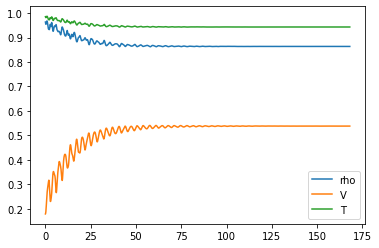

In [40]:
plt.plot(ts, rho_mid)
plt.plot(ts, V_mid)
plt.plot(ts, T_mid)
plt.legend(['rho', 'V', 'T'])

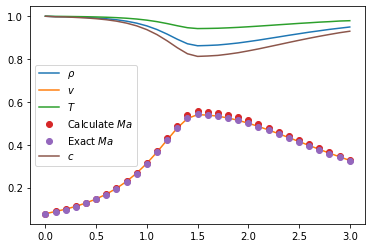

In [42]:
plt.plot(xs, rhos)
plt.plot(xs, Vs, )
plt.plot(xs, Ts)
plt.plot(xs, Mas, 'o')
plt.plot(xs, Ma_exact, 'o')
plt.plot(xs, [Ts[i] * rhos[i] for i in range(sz)])
plt.legend([r'$\rho$', r'$v$', r'$T$', r'Calculate $Ma$', r'Exact $Ma$', r'$c$'])
plt.show()

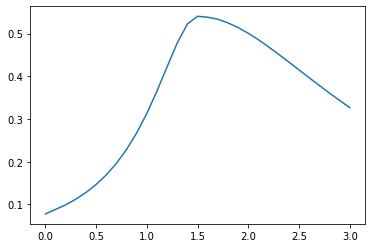

In [10]:
plt.plot(xs, Vs)

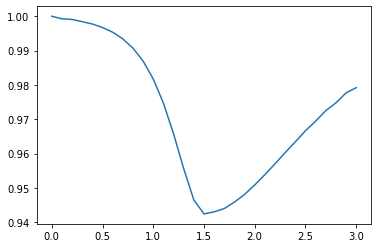

In [11]:
plt.plot(xs, Ts)

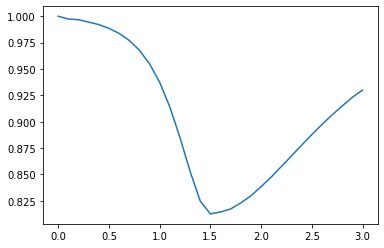

In [12]:
plt.plot(xs, [Ts[i] * rhos[i] for i in range(sz)])